# 爬取投资事件
链接：临时链接(被封了，只有临时链接)：http://webcache.googleusercontent.com/search?q=cache:http://www.cyzone.cn/event/list-764-0-1/
放弃原因：被封IP,无法继续爬
同类项：IT桔子
原因：反爬，10页之后为空

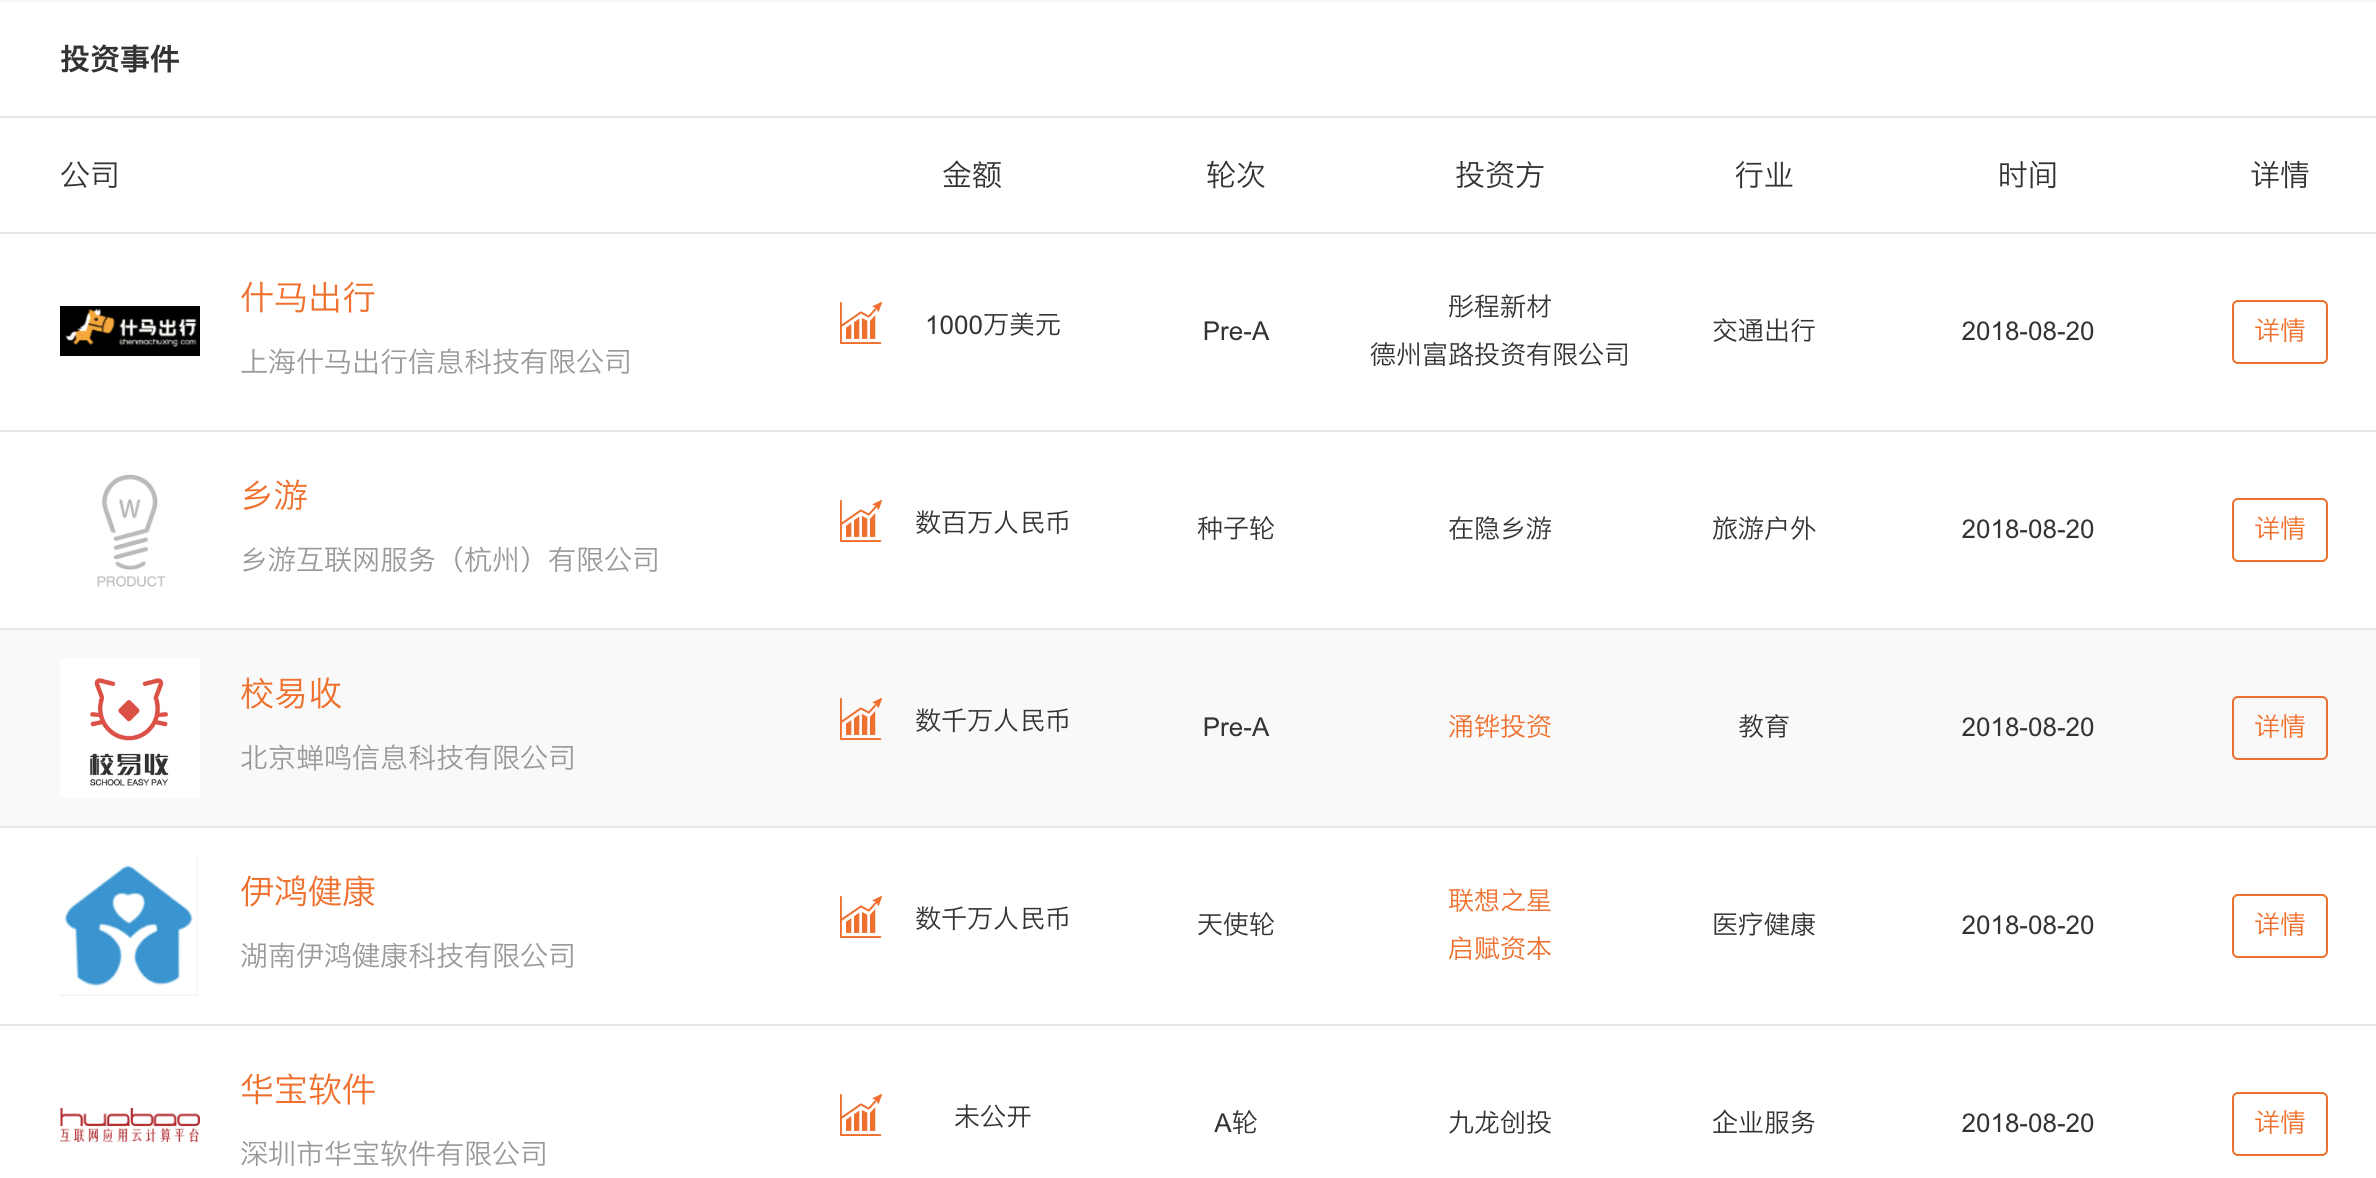

In [5]:
from IPython.display import Image
Image(filename='content.png') #创业邦，爬投资事件

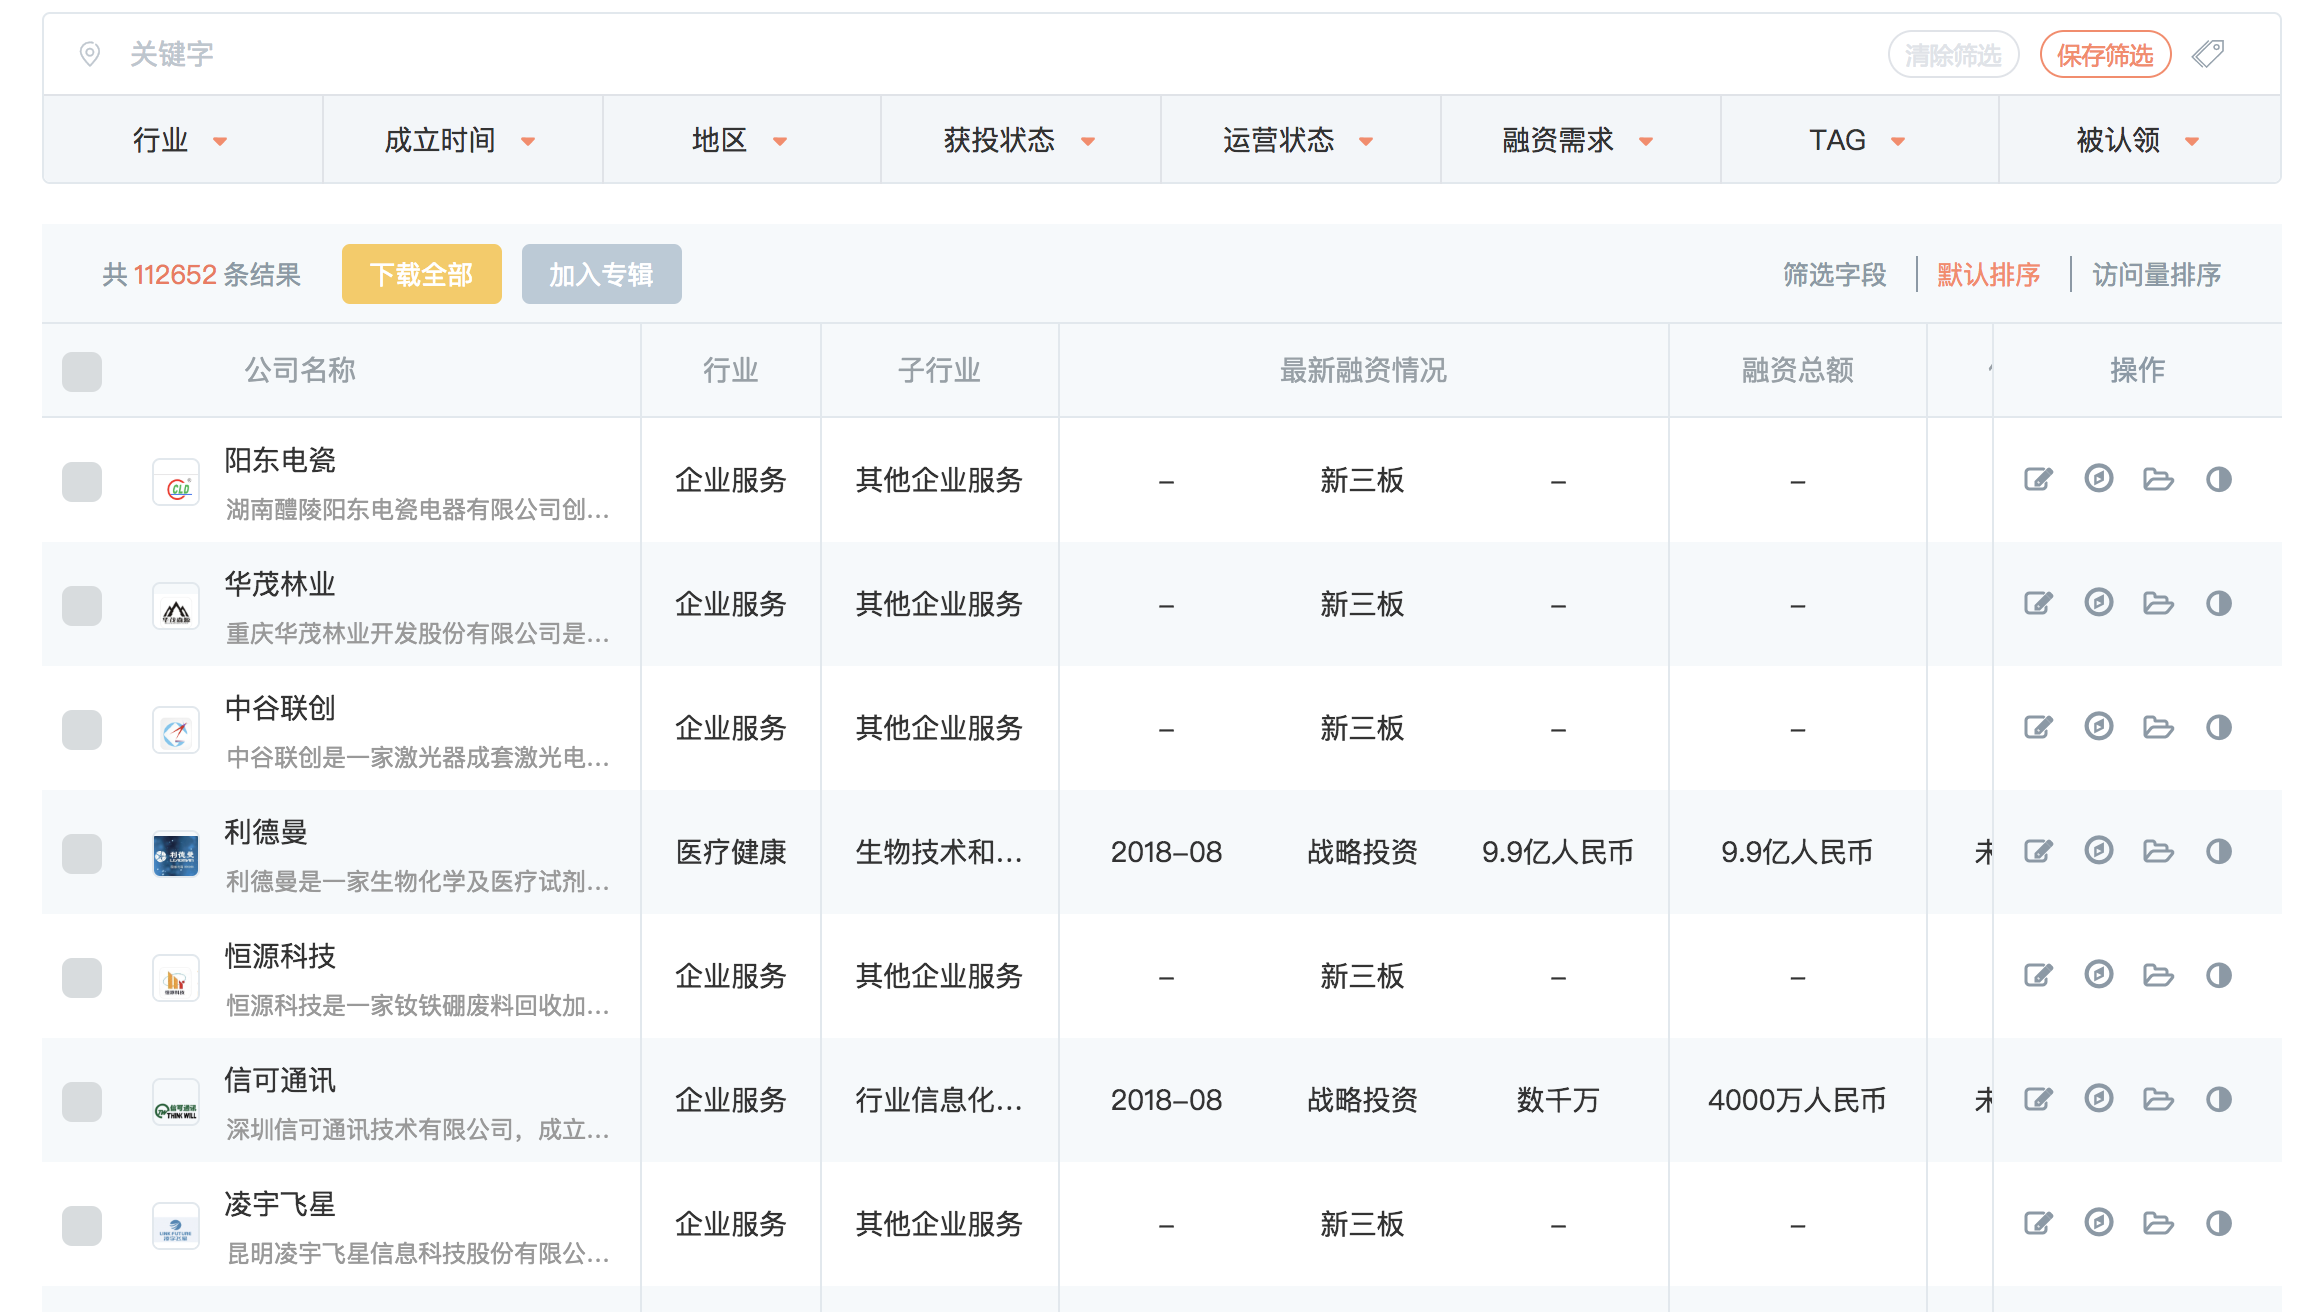

In [6]:
Image(filename='content2.png') #IT桔子，爬新公司

In [1]:
import requests
from bs4 import BeautifulSoup

In [5]:
def scrping(n):
    r = requests.get(n,headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'})
    html = BeautifulSoup(r.text)
    body = html.find_all('tr',attrs = {'class':'table-plate3'})
    totals = []
    industry = 'null'
    time = 'null'
    for item in body:
        total = []
        company = item.find('span',attrs = {'class':'tp2_com'}).text
        amount = item.find('div',attrs = {'class':'money'}).text
        for circless in item.find_all('td',attrs = {'class':'tp-mean'}):
            m = 0
            for circles in circless.find_all('td'):
                m = m + 1 
                if m == 8:
                    circle = circles.text
        invest = item.find('td',attrs = {'class':'tp3'}).get('title').strip()
        i = 0
        for ss in item.find_all('td'):
            #print(ss)
            i = i + 1
            if i == 21:
                tags = ss.find_all('a')
                #print(tags)
                for tag in tags:
                    industry = tag.text
            if i == 22:
                time = ss.text
            #if i ==7:
                #time = ss.text
       # print('over')
        total.append(company)
        total.append(amount)
        total.append(circle)
        total.append(invest)
        total.append(industry)
        total.append(time)
        totals.append(total)
    return totals

In [7]:
list_totals = []
for i in range(1,100):
    n = 'http://www.cyzone.cn/event/list-764-0-%s-0-0-0-0/' % i
    list_totals.extend(scrping(n))

ConnectionError: HTTPConnectionPool(host='www.cyzone.cn', port=80): Max retries exceeded with url: /event/list-764-0-1-0-0-0-0/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E595A63E48>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。',))

In [ ]:
import csv
with open('invest.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerows(list_totals)